# Complex Signals


In [2]:
from causalinfo import *

In [3]:
# You only need this if you want to draw pretty pictures of the Networks
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'

In [40]:
c1, c2, s1, s2, s3, s4, a1 = make_variables('c1 c2 s1 s2 s3 s4 a1', 2)
c1.assign_uniform()
c2.assign_uniform()

In [48]:
eq1 = Equation('SAME', [c1], [s1], mappings.f_same)
eq2 = Equation('SAMEB', [c2], [s2, s3], mappings.f_branch_same)
eq3 = Equation('AND', [s1, s2], [s4], mappings.f_and)
eq4 = Equation('OR', [s3, s4], [a1], mappings.f_or)

In [49]:
net = CausalNetwork([eq1, eq2, eq3, eq4])

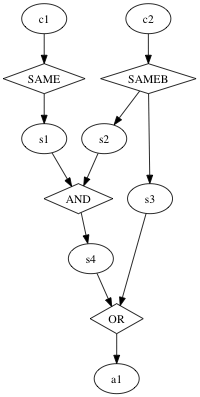

In [65]:
draw(net.full_network)

In [51]:
j_observe = net.generate_joint()
j_observe

,c1,s1,c2,s2,s4,s3,a1,Pr
0,0,0,0,0,0,0,0,0.25
1,0,0,1,1,0,1,1,0.25
2,1,1,0,0,0,0,0,0.25
3,1,1,1,1,1,1,1,0.25


In [52]:
print j_observe.mutual_info(s1, a1)
print j_observe.mutual_info(s2, a1)
print j_observe.mutual_info(s3, a1)
print j_observe.mutual_info(s4, a1)

0.0
1.0
1.0
0.311278124459


In [75]:
s2.assign_uniform()
j_do_s2 = net.generate_joint(do=[s2])
print j_do_s2.mutual_info(s2, a1)
j_do_s2

0.0487949406954


,c1,s1,c2,s2,s4,s3,a1,Pr
0,0,0,0,0,0,0,0,0.125
1,0,0,0,1,0,0,0,0.125
2,0,0,1,0,0,1,1,0.125
3,0,0,1,1,0,1,1,0.125
4,1,1,0,0,0,0,0,0.125
5,1,1,0,1,1,0,1,0.125
6,1,1,1,0,0,1,1,0.125
7,1,1,1,1,1,1,1,0.125


In [56]:
print j_do_s2.mutual_info(s1, a1)
print j_do_s2.mutual_info(s2, a1)
print j_do_s2.mutual_info(s3, a1)
print j_do_s2.mutual_info(s4, a1)

0.0487949406954
0.0487949406954
0.548794940695
0.204434002925


In [76]:
s3.assign_uniform()
j_do_s3 = net.generate_joint(do=[s3])
print j_do_s3.mutual_info(s3, a1)
j_do_s3

0.548794940695


,c1,s1,c2,s2,s4,s3,a1,Pr
0,0,0,0,0,0,0,0,0.125
1,0,0,0,0,0,1,1,0.125
2,0,0,1,1,0,0,0,0.125
3,0,0,1,1,0,1,1,0.125
4,1,1,0,0,0,0,0,0.125
5,1,1,0,0,0,1,1,0.125
6,1,1,1,1,1,0,1,0.125
7,1,1,1,1,1,1,1,0.125


In [62]:
print j_do_s3.mutual_info(s1, a1)
print j_do_s3.mutual_info(s2, a1)
print j_do_s3.mutual_info(s3, a1)
print j_do_s3.mutual_info(s4, a1)

0.0487949406954
0.0487949406954
0.548794940695
0.204434002925


In [72]:
s1.assign_uniform()
j_do_s1 = net.generate_joint(do=[s1])
j_do_s1

,c1,s1,c2,s2,s4,s3,a1,Pr
0,0,0,0,0,0,0,0,0.125
1,0,1,0,0,0,0,0,0.125
2,0,0,1,1,0,1,1,0.125
3,0,1,1,1,1,1,1,0.125
4,1,0,0,0,0,0,0,0.125
5,1,1,0,0,0,0,0,0.125
6,1,0,1,1,0,1,1,0.125
7,1,1,1,1,1,1,1,0.125


In [95]:
print j_do_s1.mutual_info(s1, a1)
print j_do_s1.mutual_info(s2, a1)
print j_do_s1.mutual_info(s3, a1)
print j_do_s1.mutual_info(s4, a1, c2)

0.0
1.0
1.0
0.0


In [74]:
j_do_s1.joint(s1, a1)

Pr
s1 a1      
0  0   0.25
   1   0.25
1  0   0.25
   1   0.25

In [67]:
j_do_s2.joint(s1, a1)

Pr
s1 a1       
0  0   0.250
   1   0.250
1  0   0.125
   1   0.375

In [71]:
j_observe.joint(s4)

,Pr
s4,
0,0.75
1,0.25


In [87]:
s4.assign_from_joint(j_observe)
print net.generate_joint(do=[s4]).mutual_info(s4, a1)

0.204434002925


In [81]:
net.generate_joint(do=[s4]).joint(s4, a1)

Pr
s4 a1 c1        
0  0  0   0.1875
      1   0.1875
   1  0   0.1875
      1   0.1875
1  1  0   0.1250
      1   0.1250